In [2]:
import torch
print(f"PyTorch version: {torch.__version__}")


ModuleNotFoundError: No module named 'torch'

In [3]:
print("hello")

hello


In [4]:
import sys
print(sys.executable)

/bin/python3


In [5]:

import torch
import numpy as np

In [1]:
import sys
print(sys.executable)

/home/jacob/comphy/Comphy/myenv/bin/python


In [6]:
x = torch.rand(5,3)
print(x)

tensor([[0.1089, 0.6373, 0.3844],
        [0.9584, 0.9384, 0.3226],
        [0.8408, 0.7065, 0.4587],
        [0.6615, 0.3370, 0.4079],
        [0.2900, 0.4899, 0.5798]])


In [4]:
torch.cuda.is_available()

False

In [8]:
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.6106, 0.9109],
        [0.6421, 0.9044]]) 



In [9]:
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.6148, 0.9531, 0.4761],
        [0.0620, 0.2841, 0.0409]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [10]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


In [11]:
# We move our tensor to the GPU if available
if torch.cuda.is_available():
    tensor = tensor.to("cuda")

In [12]:
tensor = torch.ones(4, 4)
print(f"First row: {tensor[0]}")
print(f"First column: {tensor[:, 0]}")
print(f"Last column: {tensor[..., -1]}")
tensor[:,1] = 0
print(tensor)

First row: tensor([1., 1., 1., 1.])
First column: tensor([1., 1., 1., 1.])
Last column: tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [13]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


In [17]:
# This computes the matrix multiplication between two tensors. y1, y2, y3 will have the same value
# ``tensor.T`` returns the transpose of a tensor
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)

y3 = torch.rand_like(y1)
torch.matmul(tensor, tensor.T, out=y3)


# This computes the element-wise product. z1, z2, z3 will have the same value
z1 = tensor * tensor
z2 = tensor.mul(tensor)

z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out=z3)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

In [18]:
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


In [19]:
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


In [20]:
n = np.ones(5)
t = torch.from_numpy(n)

In [35]:
np.add(n,1,out=n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([13., 13., 13., 13., 13.], dtype=torch.float64)
n: [13. 13. 13. 13. 13.]


In [42]:
def poly(x):
    a = 1
    b = 2
    c = 3
    d = 4
    y = a*x**3+b*x**2+c*x+d
    return y

<function matplotlib.pyplot.show(close=None, block=None)>

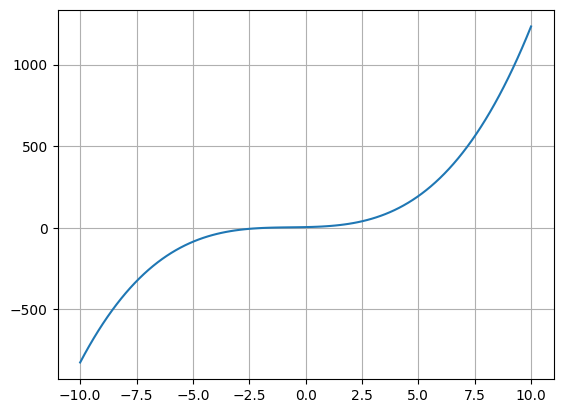

In [44]:
import matplotlib.pyplot as plt

x = np.linspace(-10,10,100)
y_values = poly(x)
plt.plot(x,y_values,label='3rd degree poly')
plt.grid(True)
plt.show

5.2 autodifferentiation

In [55]:
# one at a time
xs = torch.linspace(-2, 2, 100)
yps = []
for x in xs:
   x.requires_grad_(True)
   y =    poly(x)
   y.backward()
   yp =   x.grad
   yps.append(yp.detach())

print(yps)

[tensor(7.), tensor(6.6817), tensor(6.3731), tensor(6.0744), tensor(5.7854), tensor(5.5063), tensor(5.2369), tensor(4.9773), tensor(4.7276), tensor(4.4876), tensor(4.2574), tensor(4.0370), tensor(3.8264), tensor(3.6257), tensor(3.4346), tensor(3.2534), tensor(3.0820), tensor(2.9204), tensor(2.7686), tensor(2.6266), tensor(2.4943), tensor(2.3719), tensor(2.2593), tensor(2.1564), tensor(2.0634), tensor(1.9801), tensor(1.9066), tensor(1.8430), tensor(1.7891), tensor(1.7450), tensor(1.7107), tensor(1.6863), tensor(1.6716), tensor(1.6667), tensor(1.6716), tensor(1.6863), tensor(1.7107), tensor(1.7450), tensor(1.7891), tensor(1.8430), tensor(1.9066), tensor(1.9801), tensor(2.0634), tensor(2.1564), tensor(2.2593), tensor(2.3719), tensor(2.4943), tensor(2.6266), tensor(2.7686), tensor(2.9204), tensor(3.0820), tensor(3.2534), tensor(3.4346), tensor(3.6257), tensor(3.8264), tensor(4.0370), tensor(4.2574), tensor(4.4876), tensor(4.7276), tensor(4.9773), tensor(5.2369), tensor(5.5063), tensor(5.78

In [54]:
# all at once
xs = torch.linspace(-2, 2, 100, requires_grad=True)
ys = poly(xs)
yps = torch.autograd.grad(ys, xs, torch.ones_like(xs))[0]

xs = xs.detach().numpy()
yps = yps.detach().numpy()

# print(xs)
# print(ys)
print("derivative of poly(x)")
print(yps)

derivative of poly(x)
[ 7.         6.6816645  6.3731256  6.0743794  5.7854295  5.506275
  5.2369146  4.9773483  4.7275786  4.4876037  4.257423   4.037037
  3.8264465  3.6256504  3.4346495  3.2534432  3.0820327  2.9204164
  2.7685947  2.6265693  2.494337   2.3719008  2.2592592  2.1564126
  2.0633607  1.9801042  1.9066422  1.8429754  1.7891033  1.7450261
  1.7107439  1.6862564  1.6715641  1.6666667  1.6715641  1.6862565
  1.7107438  1.7450261  1.7891032  1.8429751  1.9066422  1.9801041
  2.063361   2.1564126  2.2592592  2.3719008  2.4943373  2.6265688
  2.768595   2.920416   3.0820324  3.2534435  3.4346495  3.6256506
  3.8264463  4.037037   4.257423   4.487603   4.7275786  4.9773493
  5.236915   5.5062747  5.7854295  6.07438    6.373125   6.6816654
  7.0000005  7.32813    7.666054   8.013774   8.371288   8.738598
  9.115704   9.502602   9.899296  10.305784  10.722069  11.148149
 11.584022  12.029691  12.485155  12.950413  13.425467  13.910316
 14.404959  14.909397  15.42363   15.947659  

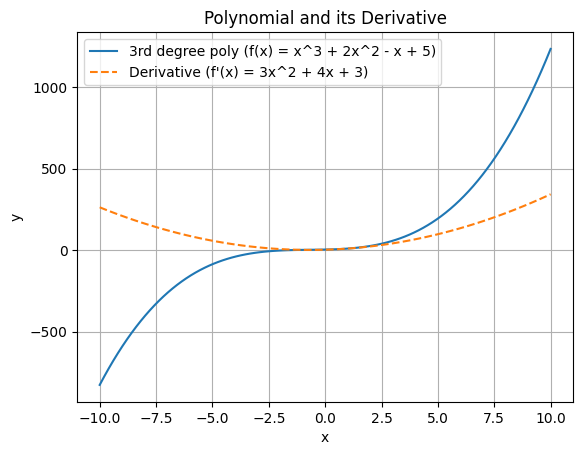

In [56]:
def poly_deriv(x):
    y = 3*x**2 + 4*x + 3
    return y

x = np.linspace(-10,10,100)
y_values = poly(x)
y_deriv_values = poly_deriv(x)

plt.plot(x, y_values, label='3rd degree poly (f(x) = x^3 + 2x^2 - x + 5)')
plt.plot(x, y_deriv_values, label='Derivative (f\'(x) = 3x^2 + 4x + 3)', linestyle='--')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial and its Derivative')

plt.grid(True)
plt.legend()

plt.show()

In [48]:
# from he tutorial on comp24.sci27.dk
ps = torch.tensor([1.0, 2, 3], requires_grad=True)
qs = ps**2
print(ps)
print(qs)
dq_dp = torch.autograd.grad(qs, ps, torch.ones_like(ps))[0]
print(dq_dp)

tensor([1., 2., 3.], requires_grad=True)
tensor([1., 4., 9.], grad_fn=<PowBackward0>)
tensor([2., 4., 6.])


5.3 higher derivatives

Second derivative of poly(x):
[-8.         -7.757576   -7.515152   -7.272727   -7.030303   -6.787879
 -6.545454   -6.30303    -6.060606   -5.818182   -5.575757   -5.333334
 -5.090909   -4.848484   -4.606061   -4.363636   -4.121212   -3.878788
 -3.6363635  -3.39394    -3.151515   -2.909091   -2.666667   -2.4242425
 -2.181818   -1.939394   -1.69697    -1.4545455  -1.212121   -0.969697
 -0.727273   -0.4848485  -0.24242401  0.          0.24242449  0.4848485
  0.7272725   0.969697    1.2121212   1.4545455   1.6969697   1.939394
  2.181818    2.4242425   2.6666665   2.909091    3.1515152   3.3939395
  3.6363635   3.8787878   4.121212    4.3636365   4.6060605   4.848485
  5.090909    5.3333335   5.5757575   5.818182    6.060606    6.30303
  6.5454545   6.787879    7.030303    7.2727275   7.5151515   7.7575755
  8.          8.242424    8.484848    8.727273    8.969697    9.212121
  9.454546    9.69697     9.939394   10.181818   10.424242   10.666667
 10.909091   11.151515   11.39394    11.6363

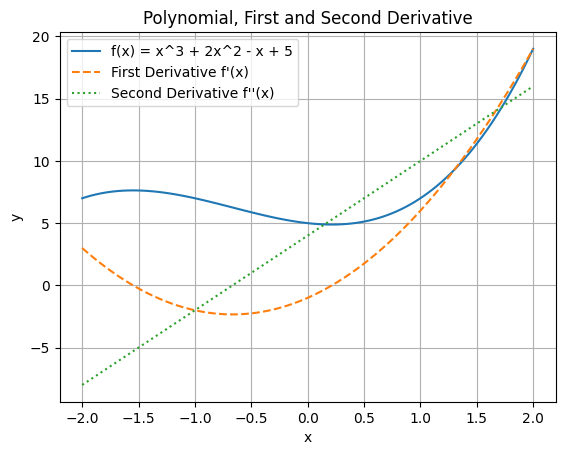

In [61]:
import torch
import numpy as np

# Define the polynomial function: f(x) = x^3 + 2x^2 - x + 5
def poly(x):
    return x**3 + 2*x**2 - x + 5

# Create tensor with requires_grad=True
xs = torch.linspace(-2, 2, 100, requires_grad=True)

# Calculate the polynomial ys = poly(xs)
ys = poly(xs)

# First derivative of ys with respect to xs
yps = torch.autograd.grad(ys, xs, torch.ones_like(xs), create_graph=True)[0]

# Second derivative of ys with respect to xs
ypps = torch.autograd.grad(yps, xs, torch.ones_like(xs), create_graph=True)[0]

# Third derivative of ys wrt xs
yppps = torch.autograd.grad(ypps, xs, torch.ones_like(xs), create_graph=True)[0]

# Detach and convert to numpy for plotting
xs_np = xs.detach().numpy()
ys_np = ys.detach().numpy()
yps_np = yps.detach().numpy()
ypps_np = ypps.detach().numpy()

# Print the second derivative
print("Second derivative of poly(x):")
print(ypps_np)

# Example plot using matplotlib
import matplotlib.pyplot as plt

plt.plot(xs_np, ys_np, label='f(x) = x^3 + 2x^2 - x + 5')
plt.plot(xs_np, yps_np, label='First Derivative f\'(x)', linestyle='--')
plt.plot(xs_np, ypps_np, label='Second Derivative f\'\'(x)', linestyle=':')
plt.grid(True)
plt.legend()
plt.title('Polynomial, First and Second Derivative')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


In [62]:
print("I h8 GIT")

I h8 GIT
